In [1]:
import os
import sys
import numpy as np
from scipy import sparse
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'svg'
from mpl_toolkits.mplot3d import Axes3D, axes3d
import scipy.cluster.hierarchy as sch
import seaborn as sns
import spacy
import nltk
from konlpy.tag import Okt
import graphviz
from sklearn.utils.fixes import loguniform

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.svm import SVC
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score, ConfusionMatrixDisplay, r2_score
from sklearn.decomposition import PCA

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston

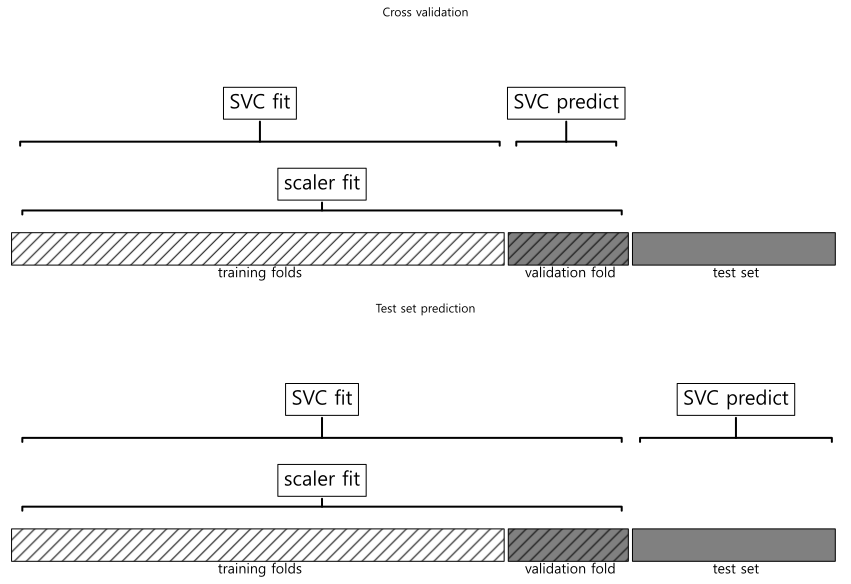

In [5]:
mglearn.plots.plot_improper_processing()

In [6]:
cancer = load_breast_cancer()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)

In [9]:
pipe = make_pipeline(MinMaxScaler(), SVC())

In [13]:
param_grid = {'svc__C':np.logspace(-3, 1, 5), 'svc__gamma':np.logspace(-3, 1, 5)}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='average_precision').fit(X_train, y_train)

In [15]:
grid.best_params_, grid.best_score_, grid.score(X_test, y_test), average_precision_score(y_test, grid.predict(X_test))

({'svc__C': 10.0, 'svc__gamma': 1.0},
 0.9958120196256701,
 0.9990400239755808,
 0.9700353967020633)

In [16]:
param_grid = {'svc__C':np.logspace(-3, 1, 5), 'svc__gamma':np.logspace(-3, 1, 5)}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='roc_auc').fit(X_train, y_train)

In [18]:
grid.best_params_, grid.best_score_, grid.score(X_test, y_test), roc_auc_score(y_test, grid.predict(X_test)), accuracy_score(y_test, grid.predict(X_test))

({'svc__C': 10.0, 'svc__gamma': 1.0},
 0.9938601756046979,
 0.9983228511530399,
 0.970020964360587,
 0.972027972027972)

In [20]:
pd.DataFrame(grid.cv_results_).T

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
mean_fit_time,0.005004,0.004204,0.004004,0.005004,0.004204,0.004205,0.004803,0.004604,0.004804,0.004804,...,0.004404,0.003603,0.002202,0.002202,0.005805,0.003603,0.002202,0.002002,0.001802,0.005805
std_fit_time,0.000633,0.0004,0.000001,0.000001,0.0004,0.000402,0.000402,0.00049,0.0004,0.0004,...,0.00049,0.00049,0.0004,0.0004,0.0004,0.00049,0.0004,0.000001,0.0004,0.000401
mean_score_time,0.004204,0.003003,0.002802,0.002803,0.003003,0.003065,0.003603,0.002803,0.002802,0.003003,...,0.003003,0.002602,0.001601,0.001001,0.002802,0.002402,0.001401,0.001001,0.001001,0.003002
std_score_time,0.001168,0.000001,0.0004,0.0004,0.0,0.000124,0.000801,0.0004,0.0004,0.0,...,0.0,0.00049,0.00049,0.000001,0.000401,0.00049,0.000491,0.0,0.0,0.0
param_svc__C,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,...,1.0,1.0,1.0,1.0,1.0,10.0,10.0,10.0,10.0,10.0
param_svc__gamma,0.001,0.01,0.1,1.0,10.0,0.001,0.01,0.1,1.0,10.0,...,0.001,0.01,0.1,1.0,10.0,0.001,0.01,0.1,1.0,10.0
params,"{'svc__C': 0.001, 'svc__gamma': 0.001}","{'svc__C': 0.001, 'svc__gamma': 0.01}","{'svc__C': 0.001, 'svc__gamma': 0.1}","{'svc__C': 0.001, 'svc__gamma': 1.0}","{'svc__C': 0.001, 'svc__gamma': 10.0}","{'svc__C': 0.01, 'svc__gamma': 0.001}","{'svc__C': 0.01, 'svc__gamma': 0.01}","{'svc__C': 0.01, 'svc__gamma': 0.1}","{'svc__C': 0.01, 'svc__gamma': 1.0}","{'svc__C': 0.01, 'svc__gamma': 10.0}",...,"{'svc__C': 1.0, 'svc__gamma': 0.001}","{'svc__C': 1.0, 'svc__gamma': 0.01}","{'svc__C': 1.0, 'svc__gamma': 0.1}","{'svc__C': 1.0, 'svc__gamma': 1.0}","{'svc__C': 1.0, 'svc__gamma': 10.0}","{'svc__C': 10.0, 'svc__gamma': 0.001}","{'svc__C': 10.0, 'svc__gamma': 0.01}","{'svc__C': 10.0, 'svc__gamma': 0.1}","{'svc__C': 10.0, 'svc__gamma': 1.0}","{'svc__C': 10.0, 'svc__gamma': 10.0}"
split0_test_score,0.978588,0.978588,0.978588,0.985532,0.989583,0.978588,0.979167,0.979745,0.985532,0.989583,...,0.978588,0.979745,0.986111,0.997685,0.996528,0.979745,0.98206,0.994213,1.0,0.993056
split1_test_score,0.994624,0.994624,0.994624,0.98865,0.961171,0.994624,0.994624,0.994026,0.98865,0.962963,...,0.994624,0.994624,0.995818,0.995818,0.959379,0.994624,0.996416,0.997611,0.997013,0.959976
split2_test_score,0.965802,0.965212,0.964623,0.954599,0.956368,0.965802,0.965212,0.965212,0.954599,0.956368,...,0.965802,0.966981,0.973467,0.973467,0.956368,0.966981,0.975825,0.973467,0.972288,0.95283


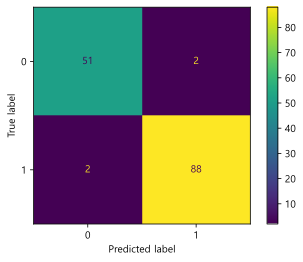

In [22]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test)

In [23]:
pipe.named_steps['svc']

SVC()

In [24]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

In [25]:
param_grid = {'logisticregression__C':np.logspace(-3, 1, 5)}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5).fit(X_train, y_train)

In [26]:
grid.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [28]:
grid.best_estimator_.named_steps['logisticregression'].coef_

array([[-0.29792942, -0.58056355, -0.3109406 , -0.377129  , -0.11984232,
         0.42855478, -0.71131106, -0.85371164, -0.46688191,  0.11762548,
        -1.38262136,  0.0899184 , -0.94778563, -0.94686238,  0.18575731,
         0.99305313,  0.11090349, -0.3458275 ,  0.20290919,  0.80470317,
        -0.91626377, -0.91726667, -0.8159834 , -0.86539197, -0.45539191,
         0.10347391, -0.83009341, -0.98445173, -0.5920036 , -0.61086989]])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=4)

In [30]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
param_grid = {'logisticregression__C':np.logspace(-3, 1, 5)}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5).fit(X_train, y_train)

In [31]:
grid.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [33]:
grid.best_estimator_.named_steps['logisticregression'].coef_.round(3)

array([[-0.436, -0.343, -0.408, -0.534, -0.15 ,  0.61 , -0.726, -0.785,
         0.039,  0.275, -1.298,  0.049, -0.673, -0.934, -0.139,  0.45 ,
        -0.13 , -0.101,  0.434,  0.716, -1.091, -1.095, -0.852, -1.064,
        -0.743,  0.073, -0.823, -0.653, -0.644, -0.42 ]])

In [34]:
boston = load_boston()

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [35]:
X_train, X_test, y_train, y_test = train_test_split(boston['data'], boston['target'], random_state=0)

In [36]:
pipe = make_pipeline(StandardScaler(), PolynomialFeatures(), Ridge())

In [46]:
param_grid = {'polynomialfeatures__degree':[1, 2, 3], 'ridge__alpha':np.logspace(-4, 2, 7)}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5).fit(X_train, y_train)

<AxesSubplot:>

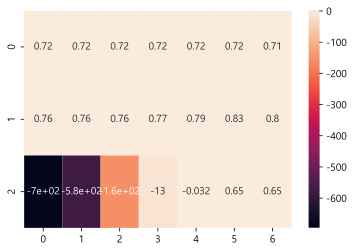

In [54]:
sns.heatmap(grid.cv_results_['mean_test_score'].reshape(3, -1), annot=True)

In [55]:
grid.best_params_

{'polynomialfeatures__degree': 2, 'ridge__alpha': 10.0}

In [57]:
grid.score(X_test, y_test), r2_score(y_test, grid.predict(X_test))

(0.7683045464100137, 0.7683045464100137)

In [58]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])
param_grid = [{'classifier':[SVC()], 'preprocessing':[StandardScaler()],
               'classifier__C':[0.001, 0.01, 0.1, 1, 10, 100], 'classifier__gamma':[0.001, 0.01, 0.1, 1, 10, 100]},
             {'classifier':[RandomForestClassifier(n_estimators=100)],
             'preprocessing':[None], 'classifier__max_features':[1, 2, 3]}]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)

In [61]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5).fit(X_train, y_train)

In [62]:
grid.best_params_, grid.best_score_, accuracy_score(y_test, grid.predict(X_test))

({'classifier': SVC(C=10, gamma=0.01),
  'classifier__C': 10,
  'classifier__gamma': 0.01,
  'preprocessing': StandardScaler()},
 0.9858823529411765,
 0.9790209790209791)